In [16]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import cv2 as cv
import sklearn.utils.extmath


In [17]:
def img_compress(k, img):


    new_img = np.zeros(img.shape)
    u, sigma, vt = np.linalg.svd(img[:, :, 0])
    sig = np.eye(k) * sigma[: k]
    new_img[:,:,0] = np.dot(np.dot(u[:, :k], sig), vt[:k, :])
    
    u, sigma, vt = np.linalg.svd(img[:, :, 1])
    sig = np.eye(k) * sigma[: k]
    new_img[:,:,1] = np.dot(np.dot(u[:, :k], sig), vt[:k, :])
    
    u, sigma, vt = np.linalg.svd(img[:, :, 2])
    sig = np.eye(k) * sigma[: k]
    new_img[:,:,2] = np.dot(np.dot(u[:, :k], sig), vt[:k, :])
    size = u.shape[0] * k + sig.shape[0] * sig.shape[1] + k * vt.shape[1]
    for i in range(3):
        MAX = np.max(new_img[:, :, i])
        MIN = np.min(new_img[:, :, i])
        new_img[:, :, i] = (new_img[:, :, i] - MIN) / (MAX - MIN)

    # 调整到[0, 255]
    new_img  = np.round(new_img * 255).astype('int')
    
    return new_img, size * 3





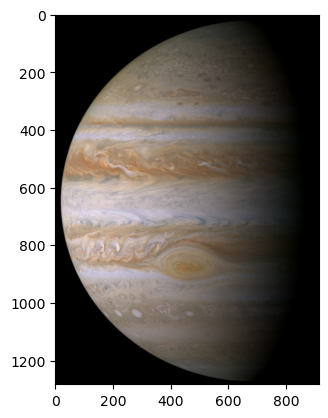

In [47]:
img1 = cv.imread('./img/3.jpg', 1)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB) 
plt.imshow(img1)
plt.show()

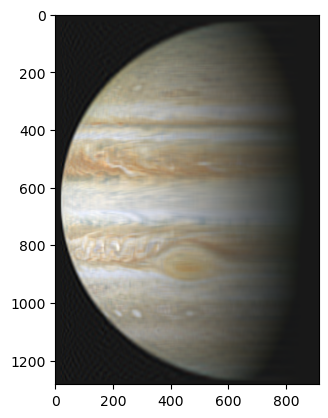

In [50]:
k = 30
new_img, size = img_compress(k, img1)
plt.imshow(new_img)
plt.show()

In [32]:

def shuffle_img_compress(k, img):
    new_img = np.zeros(img.shape)
    u, sigma, vt = sklearn.utils.extmath.randomized_svd(img[:, :, 0], n_components=k, n_oversamples = (np.sqrt(img.shape[0])).astype(np.int16), n_iter='auto')
    sig = np.eye(k) * sigma[: k]
    new_img[:,:,0] = np.dot(np.dot(u[:, :k], sig), vt[:k, :])
    
    u, sigma, vt = sklearn.utils.extmath.randomized_svd(img[:, :, 1], n_components=k, n_oversamples = (np.sqrt(img.shape[0])).astype(np.int16), n_iter='auto')
    sig = np.eye(k) * sigma[: k]
    new_img[:,:,1] = np.dot(np.dot(u[:, :k], sig), vt[:k, :])
    
    u, sigma, vt = sklearn.utils.extmath.randomized_svd(img[:, :, 2], n_components=k, n_oversamples = (np.sqrt(img.shape[0])).astype(np.int16), n_iter='auto')
    sig = np.eye(k) * sigma[: k]
    new_img[:,:,2] = np.dot(np.dot(u[:, :k], sig), vt[:k, :])
    size = u.shape[0] * k + sig.shape[0] * sig.shape[1] + k * vt.shape[1]
    for i in range(3):
        MAX = np.max(new_img[:, :, i])
        MIN = np.min(new_img[:, :, i])
        new_img[:, :, i] = (new_img[:, :, i] - MIN) / (MAX - MIN)

    # 调整到[0, 255]
    new_img  = np.round(new_img * 255).astype('int')
    
    return new_img, size * 3


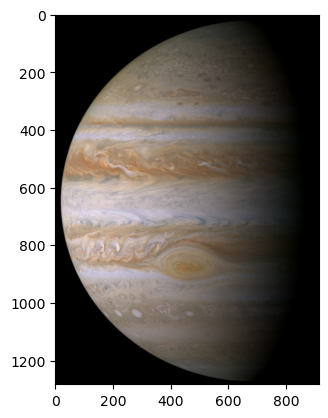

In [51]:
img1 = cv.imread('./img/3.jpg', 1)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB) 
plt.imshow(img1)
plt.show()

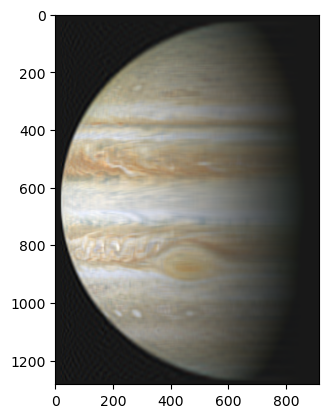

In [54]:
k = 30
new_img, size = shuffle_img_compress(k, img1)
plt.imshow(new_img)
plt.show()